In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import bernoulli

from exchange import *
from agents import *
from simulation import *

plt.rcParams['figure.dpi'] = 300

In [2]:
def execute_policy(e: Exchange, price_function, policy_number: int):
    # main character params: true_value, quantity, side, spread, cid

    if list(e.bids.keys()) != [] and list(e.asks.keys()) != []:
        tob_bid = max(e.bids.keys())
        tob_ask = min(e.asks.keys())
    else: 
        return
    current_true_value = price_function(e.get_timestamp())

    policies = []

    ### quote 6 wide around 100 ###
    policies.append(MainCharacter(true_value=100, quantity=10, side="AB", spread=3, cid=-1.5))

    ### quote 2 wide around 100 ### 
    policies.append(MainCharacter(true_value=100, quantity=10, side="AB", spread=1, cid=-2.5))

    ### quote 2 wide around 100, quantity 1 ###
    policies.append(MainCharacter(true_value=100, quantity=1, side="AB", spread=1, cid=-3.5))

    ### quote 2 wide around true val (perfect information) ###
    policies.append(MainCharacter(true_value = price_function(e.get_timestamp()), quantity=5, side="AB", spread=1, cid=-4.5))

    ### quote 2 wide around true val 10 timestamps ago ### 
    policies.append(MainCharacter(true_value=price_function(e.get_timestamp() - 10), quantity=5, side="AB", spread=1, cid=-5.5))

    ### quote 2 wide around true value 10 timestamps into future ###
    policies.append(MainCharacter(true_value=price_function(e.get_timestamp() + 10), quantity=5, side="AB", spread=1, cid=-6.5))

    ### quote 6 wide around true value  ###
    policies.append(MainCharacter(true_value=price_function(e.get_timestamp() + 10), quantity=5, side="AB", spread=3, cid=-7.5))

    ### psychic far looking wide policy ###
    policies.append(MainCharacter(true_value=price_function(e.get_timestamp() + 50), quantity=5, side="AB", spread=3, cid=-8.5))

    if policy_number <= 7:
        a = policies[policy_number]
        if a.cid not in list(e.ask_customers.keys()) and a.cid not in list(e.bid_customers.keys()):
            e.add_order(a)
        return

    ### quote 1 ticks from top of book ### 
    if policy_number == 8:
        b = MainCharacter(true_value=tob_bid, quantity=5, side="B", spread=1, cid=-9.5)
        a = MainCharacter(true_value=tob_ask, quantity=5, side="A", spread=1, cid=-9.5)
        if a.cid not in list(e.ask_customers.keys()):
            e.add_order(a)
        if b.cid not in list(e.bid_customers.keys()):
            e.add_order(b)

    ### long-short taking strategy, perfect information ###
    if policy_number == 9:
        if tob_ask < price_function(e.get_timestamp()):
            b = MainCharacter(true_value=tob_ask, quantity=min(10, e.asks[tob_ask]), side="B", spread=0, cid=-10.5)
            e.add_order(b)
        if tob_bid > price_function(e.get_timestamp()):
            a = MainCharacter(true_value=tob_bid, quantity=min(10, e.bids[tob_bid]), side="A", spread=0, cid=-10.5)
            e.add_order(a)

    ### taking strategy, lagged information ###
    if policy_number == 10:
        if tob_ask < price_function(e.get_timestamp() - 10):
            b = MainCharacter(true_value=tob_ask, quantity=min(10, e.asks[tob_ask]), side="B", spread=0, cid=-10.5)
            e.add_order(b)
        if tob_bid > price_function(e.get_timestamp() - 10):
            a = MainCharacter(true_value=tob_bid, quantity=min(10, e.bids[tob_bid]), side="A", spread=0, cid=-10.5)
            e.add_order(a)

In [3]:
# %%capture

price_function = lambda t: abs(-0.000005 * t ** 2 + 0.05 * t + 100 + np.sin(t / 500) * 30)

policy_num = 9
profits = []
ranks = []
exchanges = []
summaries = []

print("here")
for iteration in range(200): # run 200 simulations
    print("iteration", iteration)
    e = simulate(price_function, execute_policy, policy_number=policy_num, agent_arrival_rate=0.1, taker_probability=0.4, n=10000)
    summary, profit = summarize_transactions(e, price_function, num_agents=20)
    summaries.append(summary)
    exchanges.append(e)

    if len(profit[profit.index % 1 == 0.5]) == 0:
        p = 0 
        rank = None
    else: 
        p = profit[profit.index % 1 == 0.5].iloc[0, -1]
        rank = list(profit.index % 1).index(0.5) + 1
    profits.append(p)
    ranks.append(rank)

here
iteration 0
total simulation time: 10000.638030940634
total agents: 1024


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


iteration 1
total simulation time: 10003.818677184576
total agents: 1033
iteration 2


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.552387712303
total agents: 1007
iteration 3


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.228236813466
total agents: 939
iteration 4


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.363376849242
total agents: 1005
iteration 5


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.207910992067
total agents: 1003
iteration 6


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.832744071722
total agents: 1007
iteration 7


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.38133071703
total agents: 978
iteration 8


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10017.57962932407
total agents: 1005
iteration 9


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.020996568997
total agents: 1015
iteration 10


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.445118611115
total agents: 1015
iteration 11


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.17632005955
total agents: 1020
iteration 12


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.501992151638
total agents: 1007
iteration 13


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10012.183099449501
total agents: 985
iteration 14


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10013.26124945337
total agents: 994
iteration 15


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10036.049044300398
total agents: 998
iteration 16


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.744283106698
total agents: 1011
iteration 17


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.81505026863
total agents: 1025
iteration 18


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.737333932999
total agents: 973
iteration 19


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.190015610782
total agents: 1012
iteration 20


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.465496943498
total agents: 1063
iteration 21


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.675096262376
total agents: 1035
iteration 22


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.217624109513
total agents: 1007
iteration 23


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.810399156871
total agents: 997
iteration 24


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.82529647568
total agents: 1026
iteration 25


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.088451989515
total agents: 967
iteration 26


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.549499270819
total agents: 988
iteration 27


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.959229627566
total agents: 1088
iteration 28


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.259067436897
total agents: 1046
iteration 29


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.142901512689
total agents: 948
iteration 30


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.67399218674
total agents: 950
iteration 31


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10010.418876604605
total agents: 960
iteration 32


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.108310946956
total agents: 984
iteration 33


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.63260733701
total agents: 965
iteration 34


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.62469747136
total agents: 1008
iteration 35


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.063657629498
total agents: 1023
iteration 36


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.635590998758
total agents: 976
iteration 37


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.743190076295
total agents: 1030
iteration 38


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10016.163316261393
total agents: 1000
iteration 39


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10021.527580680213
total agents: 1015
iteration 40


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.825161824652
total agents: 970
iteration 41


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.727876644196
total agents: 1000
iteration 42


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.510259184579
total agents: 1047
iteration 43


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10010.210502654634
total agents: 1010
iteration 44


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.627534186415
total agents: 1002
iteration 45


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10012.456713600126
total agents: 1056
iteration 46


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.335295667921
total agents: 959
iteration 47


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.243442467996
total agents: 1010
iteration 48


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10031.120612517401
total agents: 1026
iteration 49


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.782034163289
total agents: 1039
iteration 50


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.00289688293
total agents: 1027
iteration 51


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.891730093921
total agents: 951
iteration 52


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.37247217892
total agents: 1064
iteration 53


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.735794224114
total agents: 1007
iteration 54


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.121364432358
total agents: 1025
iteration 55


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.970353389246
total agents: 998
iteration 56


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10034.890595041337
total agents: 979
iteration 57


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10051.399088470804
total agents: 1040
iteration 58


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.293024023882
total agents: 963
iteration 59


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.395094754145
total agents: 1001
iteration 60


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10016.75746053356
total agents: 984
iteration 61


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10010.115107000633
total agents: 1054
iteration 62


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.932975157177
total agents: 1001
iteration 63


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10018.12665915245
total agents: 1006
iteration 64


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.729483028368
total agents: 1010
iteration 65


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.806968120232
total agents: 994
iteration 66


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.259399853054
total agents: 1062
iteration 67


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.809473890557
total agents: 982
iteration 68


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.345442212682
total agents: 947
iteration 69


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10034.22518236132
total agents: 1062
iteration 70


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.19946249782
total agents: 905
iteration 71


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.60972683248
total agents: 1033
iteration 72


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.376787335981
total agents: 964
iteration 73


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10010.271870788292
total agents: 1061
iteration 74


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.096068810384
total agents: 975
iteration 75


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10013.521516254254
total agents: 1002
iteration 76


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.839287074263
total agents: 1075
iteration 77


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10022.715617737065
total agents: 1006
iteration 78


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10016.879892079181
total agents: 971
iteration 79


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.945731013046
total agents: 985
iteration 80


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10033.961118208596
total agents: 993
iteration 81


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.957794062855
total agents: 1024
iteration 82


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.783351193546
total agents: 965
iteration 83


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.860809493372
total agents: 1010
iteration 84


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10012.162656656652
total agents: 1063
iteration 85


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.028330354826
total agents: 1031
iteration 86


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10017.703128340087
total agents: 997
iteration 87


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.684369638699
total agents: 982
iteration 88


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.304247434173
total agents: 1032
iteration 89


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.109845877481
total agents: 1022
iteration 90


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.156683609252
total agents: 983
iteration 91


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10027.383275285145
total agents: 980
iteration 92


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10010.816741629711
total agents: 980
iteration 93


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10012.977937793039
total agents: 1010
iteration 94


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.459798930746
total agents: 1063
iteration 95


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10017.696715364997
total agents: 990
iteration 96


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10018.174978492856
total agents: 999
iteration 97


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.890728696715
total agents: 997
iteration 98


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10010.113490228454
total agents: 1021
iteration 99


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.139431476502
total agents: 1014
iteration 100


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.725536091373
total agents: 961
iteration 101


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10029.301902860561
total agents: 1019
iteration 102


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.158641624186
total agents: 999
iteration 103


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10016.717876055742
total agents: 1012
iteration 104


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.862803594786
total agents: 994
iteration 105


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.05301630366
total agents: 985
iteration 106


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.157097388563
total agents: 1071
iteration 107


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.261317203756
total agents: 994
iteration 108


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10022.982359072052
total agents: 1023
iteration 109


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.245040043372
total agents: 1020
iteration 110


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.303075830156
total agents: 1006
iteration 111


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10027.830400624744
total agents: 1023
iteration 112


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10013.439055633158
total agents: 1027
iteration 113


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10038.005915460206
total agents: 1005
iteration 114


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10042.060989449636
total agents: 976
iteration 115


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.303694702468
total agents: 1030
iteration 116


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.503255046215
total agents: 983
iteration 117


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10017.186077795674
total agents: 991
iteration 118


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10013.7923672137
total agents: 1045
iteration 119


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.291052057717
total agents: 1025
iteration 120


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.929566573273
total agents: 970
iteration 121


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.148812482896
total agents: 977
iteration 122


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10018.41651447155
total agents: 949
iteration 123


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.062140935373
total agents: 992
iteration 124


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10029.47101988015
total agents: 979
iteration 125


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.48768351546
total agents: 1013
iteration 126


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10017.439142229541
total agents: 984
iteration 127


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.357083107032
total agents: 1029
iteration 128


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10029.187284309122
total agents: 989
iteration 129


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.531302339237
total agents: 1006
iteration 130


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10012.104135538602
total agents: 982
iteration 131


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.910009144885
total agents: 923
iteration 132


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10010.314285085722
total agents: 995
iteration 133


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.59454597285
total agents: 999
iteration 134


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.333663881702
total agents: 981
iteration 135


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.798713354863
total agents: 1066
iteration 136


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.103071769214
total agents: 1031
iteration 137


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10026.3644519299
total agents: 986
iteration 138


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.70003408336
total agents: 965
iteration 139


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10010.191258409544
total agents: 1020
iteration 140


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.15665569502
total agents: 1008
iteration 141


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10020.891026592526
total agents: 956
iteration 142


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.369282974663
total agents: 953
iteration 143


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10021.50247960399
total agents: 1018
iteration 144


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10011.231631574803
total agents: 1005
iteration 145


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.258777486151
total agents: 1021
iteration 146


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.095724144136
total agents: 974
iteration 147


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10013.54218392169
total agents: 1036
iteration 148


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.213084699793
total agents: 1053
iteration 149


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.81637837203
total agents: 1023
iteration 150


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10015.3402807266
total agents: 973
iteration 151


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.829200805952
total agents: 1036
iteration 152


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.127608475566
total agents: 1007
iteration 153


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.682032720195
total agents: 966
iteration 154


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.407947821644
total agents: 978
iteration 155


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.256093207572
total agents: 1010
iteration 156


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.643448573166
total agents: 948
iteration 157


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.300470321734
total agents: 1025
iteration 158


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10015.276667006936
total agents: 1001
iteration 159


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.383135763288
total agents: 1031
iteration 160


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10009.191671194847
total agents: 983
iteration 161


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.407949376227
total agents: 964
iteration 162


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.242915005998
total agents: 1013
iteration 163


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.947091457276
total agents: 1042
iteration 164


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.415857030142
total agents: 977
iteration 165


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10034.740828558994
total agents: 1001
iteration 166


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.438775925484
total agents: 1025
iteration 167


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10016.452010799445
total agents: 982
iteration 168


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.88774871012
total agents: 1039
iteration 169


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.660179059836
total agents: 1053
iteration 170


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.804432451694
total agents: 1003
iteration 171


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10031.045349919312
total agents: 1011
iteration 172


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.886185097506
total agents: 1022
iteration 173


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.402045345067
total agents: 1012
iteration 174


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10014.14431632997
total agents: 969
iteration 175


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.824432003148
total agents: 1030
iteration 176


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10007.615644168856
total agents: 991
iteration 177


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.978035243552
total agents: 982
iteration 178


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10019.11829925598
total agents: 1031
iteration 179


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.724463001097
total agents: 1023
iteration 180


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.282718521932
total agents: 1008
iteration 181


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.050553112573
total agents: 1065
iteration 182


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10012.49488583769
total agents: 1007
iteration 183


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10008.110513513499
total agents: 1015
iteration 184


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.224493029908
total agents: 1020
iteration 185


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10016.015865973673
total agents: 1054
iteration 186


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10015.665974510724
total agents: 966
iteration 187


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10016.765222480835
total agents: 1025
iteration 188


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10000.198302357046
total agents: 1022
iteration 189


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10012.14329372884
total agents: 1041
iteration 190


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.783509057032
total agents: 1032
iteration 191


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10006.949915226052
total agents: 1022
iteration 192


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10001.419928318091
total agents: 997
iteration 193


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10025.653487349446
total agents: 1016
iteration 194


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10002.55388523932
total agents: 999
iteration 195


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10036.515950976362
total agents: 1048
iteration 196


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10080.75891737223
total agents: 988
iteration 197


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10004.197236122958
total agents: 1002
iteration 198


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10003.901014912679
total agents: 968
iteration 199


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


total simulation time: 10005.69766744629
total agents: 987


c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long["customer_side"] = ["bid"] * len(long)
c:\Users\Albert Wen\github\marketSimulationIEOR174\simulation.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short["customer_side"] = ["ask"] * len(long)


Text(0.5, 0, 'timestamp')

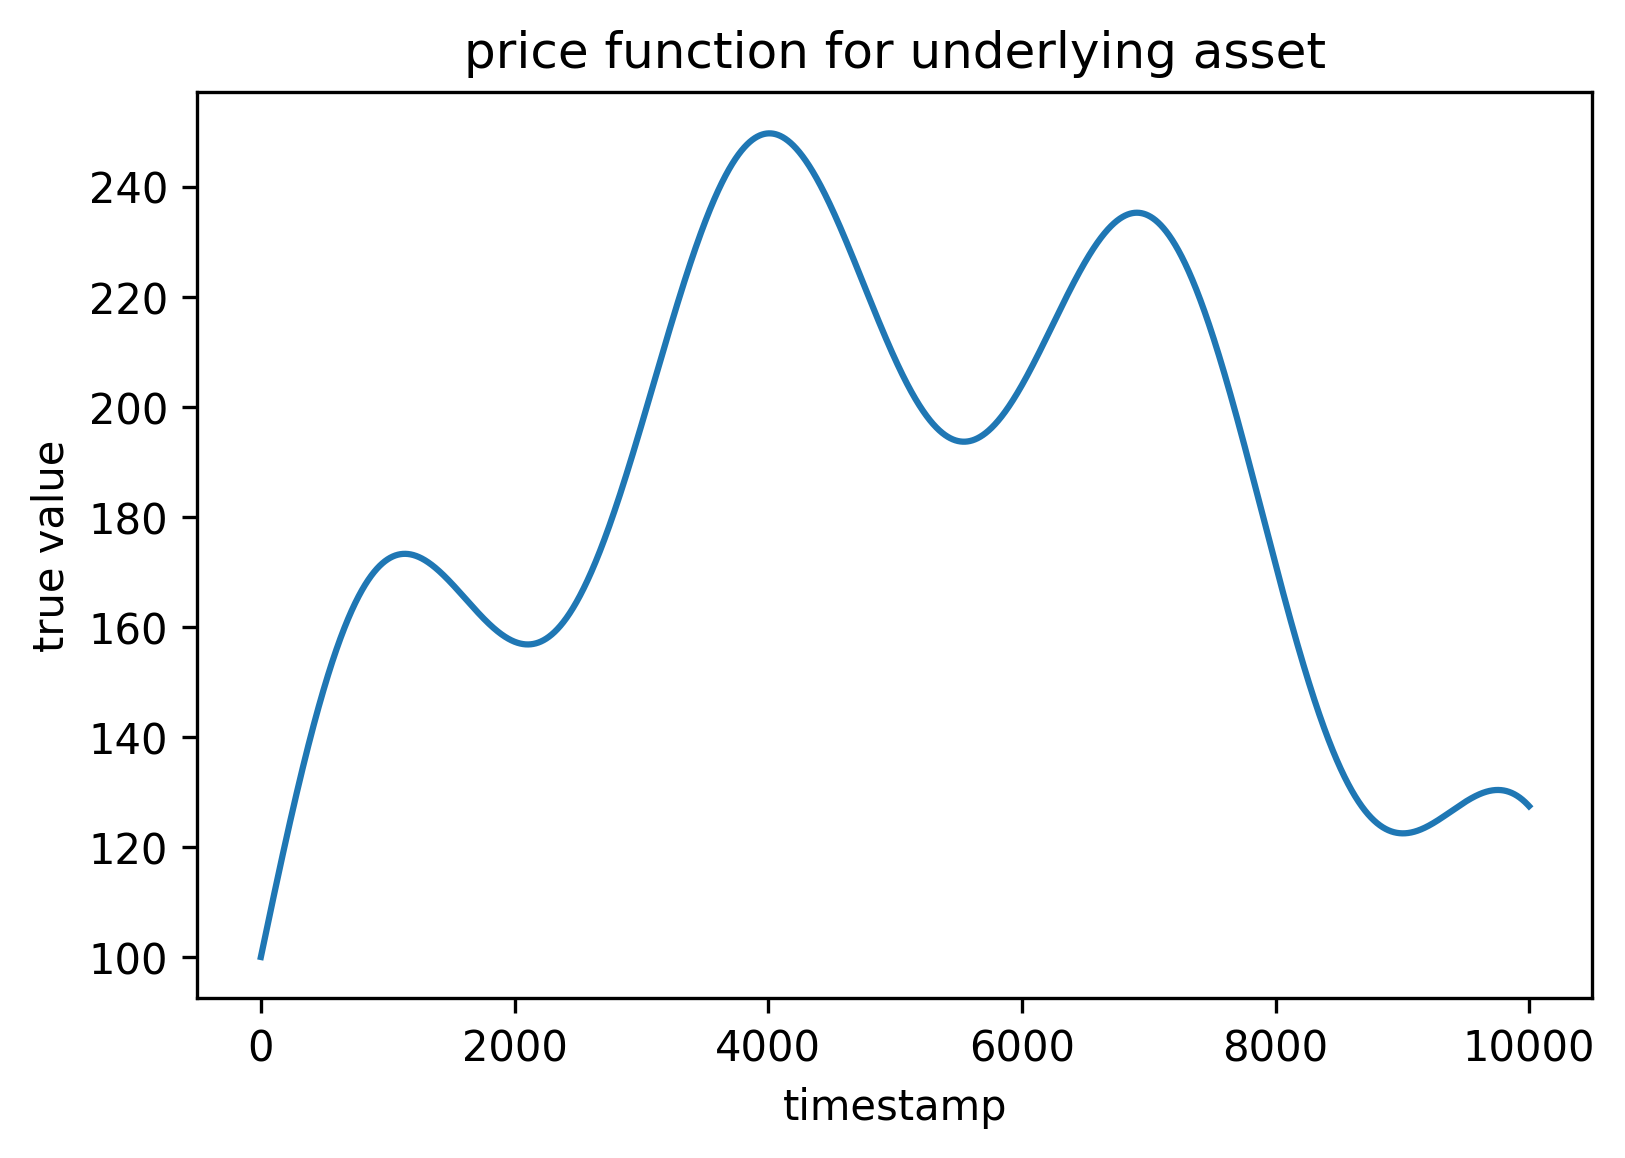

In [17]:
price_function = lambda t: abs(-0.000005 * t ** 2 + 0.05 * t + 100 + np.sin(t / 500) * 30)
times = range(10000)
plt.plot([price_function(t) for t in times])
plt.title("price function for underlying asset")
plt.ylabel("true value")
plt.xlabel("timestamp")

Text(0.5, 1.0, 'Profit Distribution over 200 simulations')

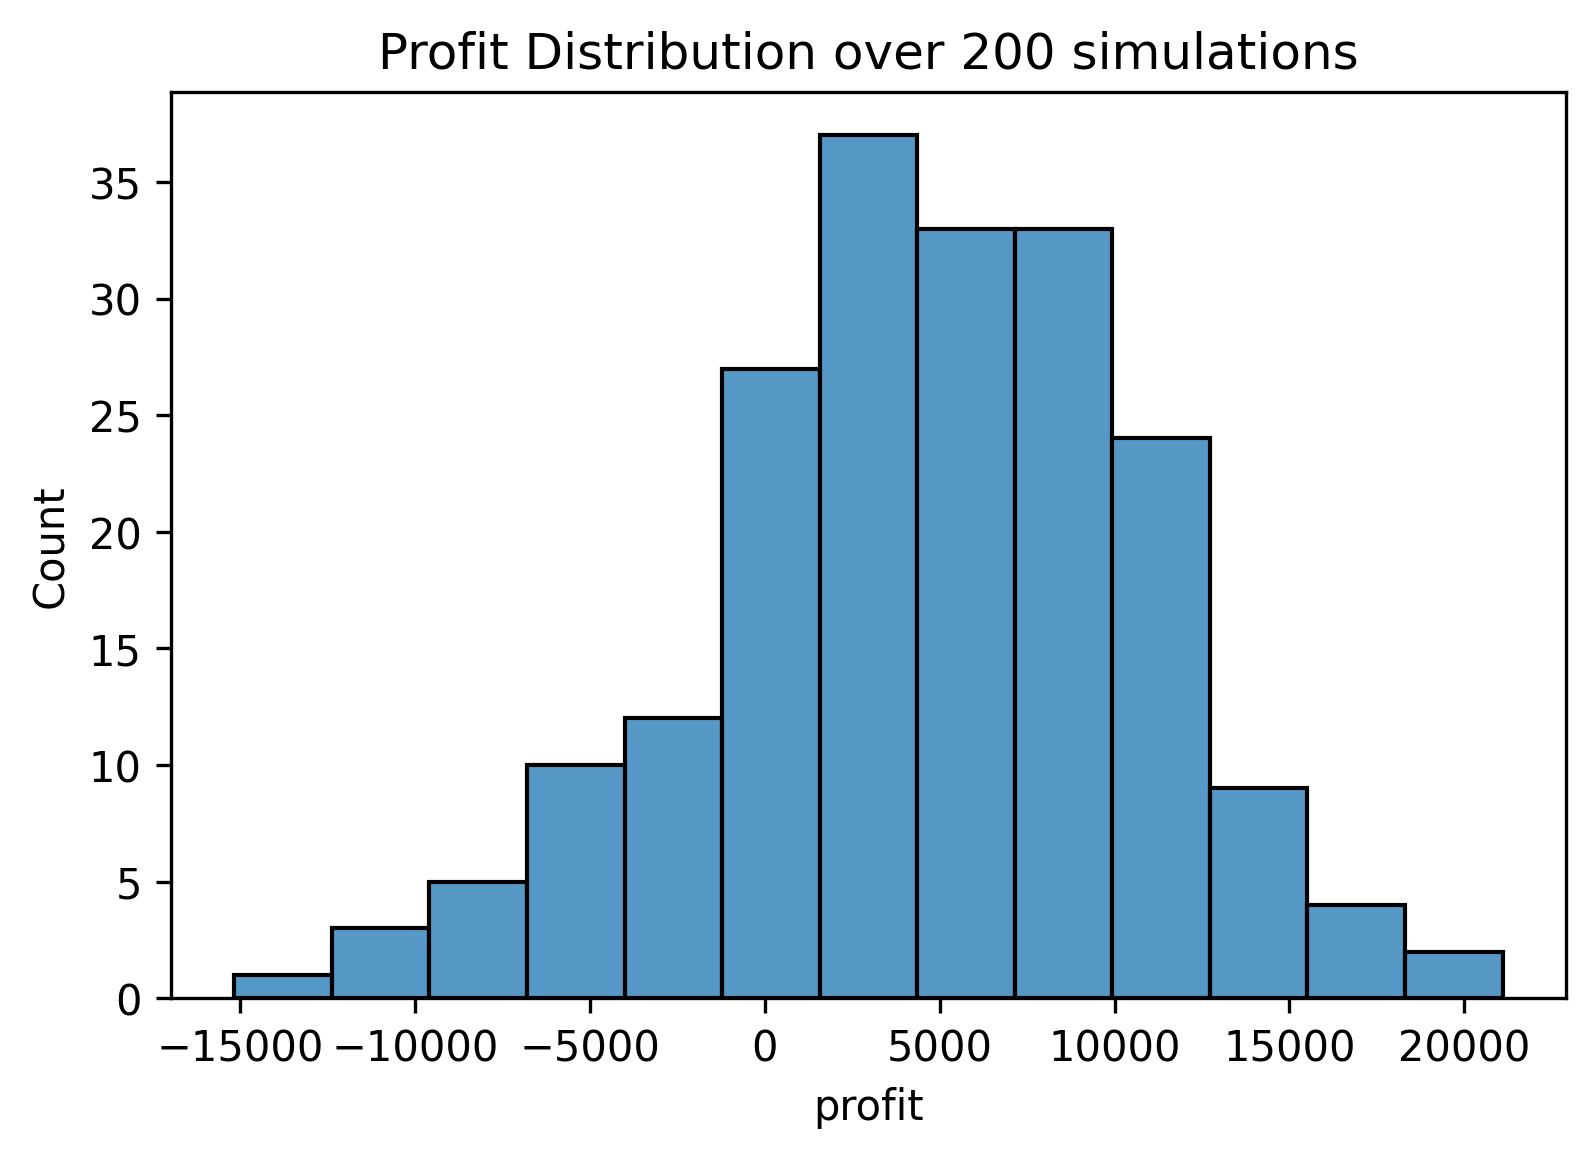

In [18]:
sns.histplot(profits)
plt.xlabel("profit")
plt.title("Profit Distribution over 200 simulations")

In [19]:
# transactions = []
taker_arr = []
maker_arr = []

ask_arr = []
bid_arr = []

for exchange in exchanges:
    takers = 0
    makers = 0
    bids = 0
    asks = 0
    for transaction in exchange.transactions:
        aggressor_id = transaction["aggressor_id"]
        aggressor_order = exchange.orders[aggressor_id]
        if len(aggressor_order) == 2:
            makers += 1
        else: 
            takers += 1
        if transaction["aggressor_side"] == "ask":
            asks += 1
        else: 
            bids += 1
    taker_arr.append(takers)
    maker_arr.append(makers)
    ask_arr.append(asks)
    bid_arr.append(bids)

Text(0, 0.5, 'num makers')

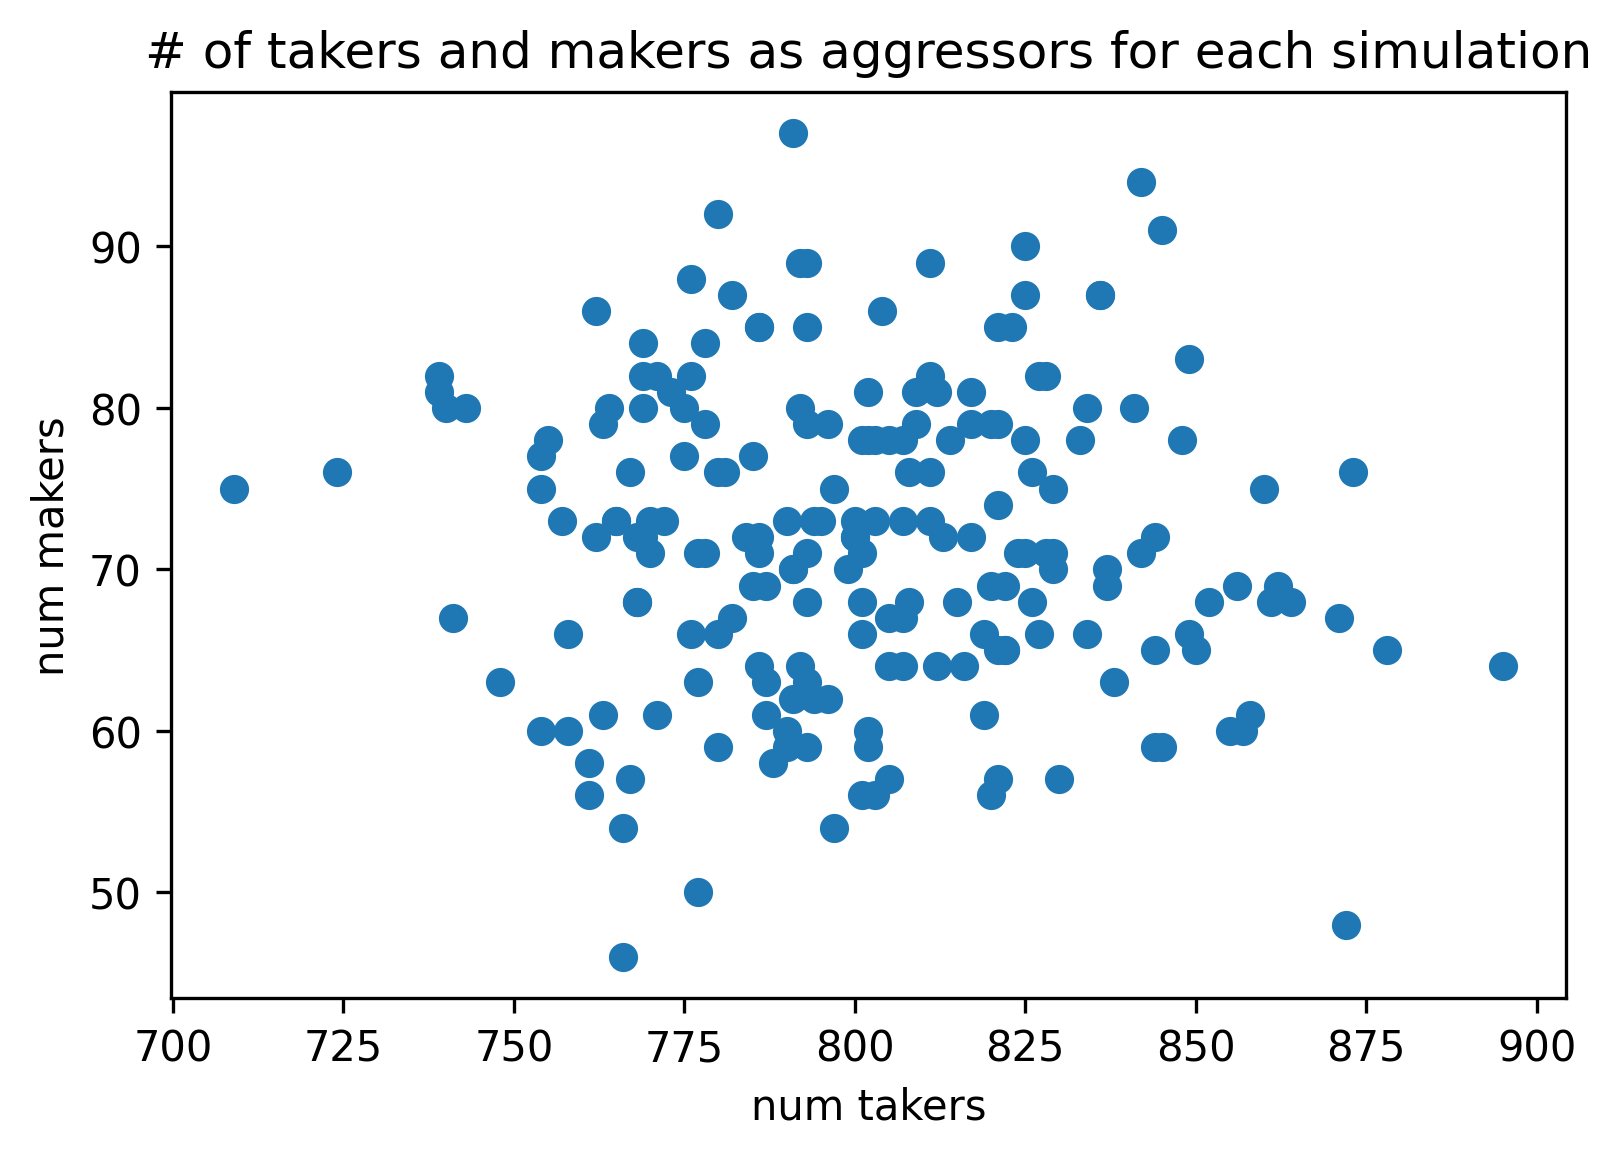

In [20]:
plt.scatter(taker_arr, maker_arr)
plt.title("# of takers and makers as aggressors for each simulation")
plt.xlabel("num takers")
plt.ylabel("num makers")

Text(0.5, 1.0, 'Distribution of Takers vs Makers on Aggressor-Side of Trades')

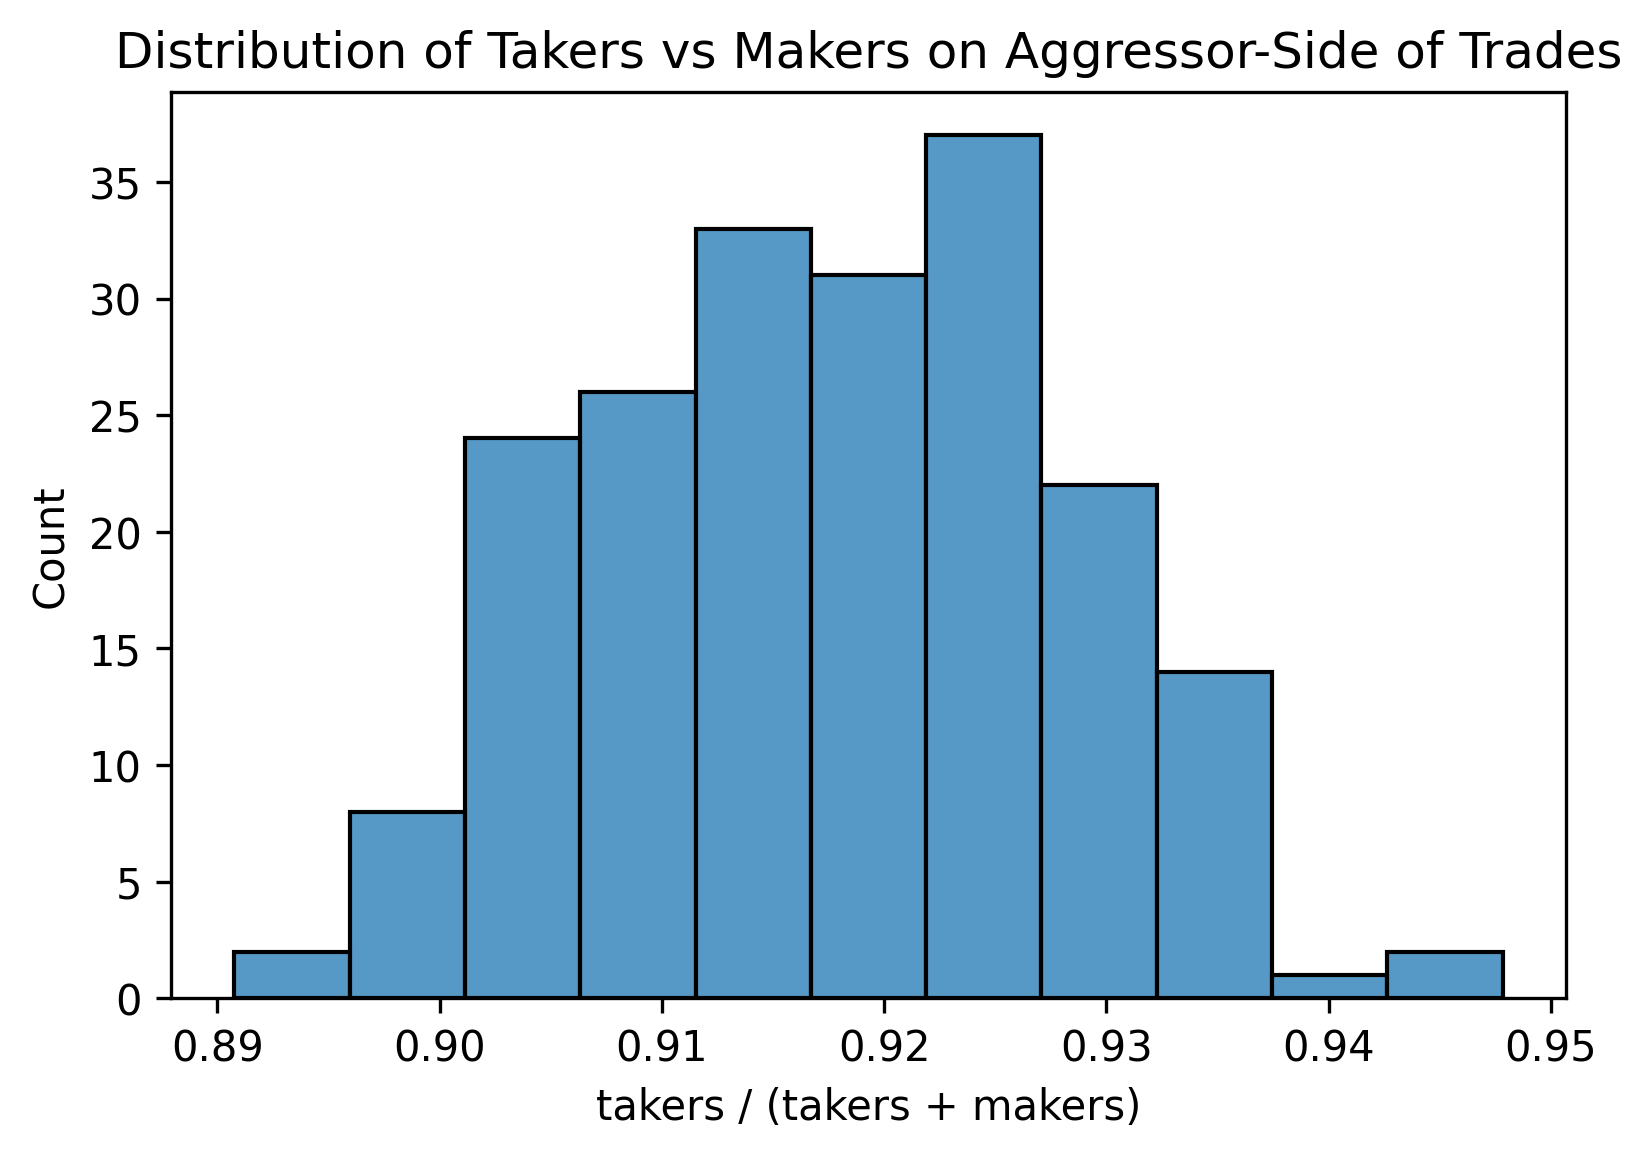

In [21]:
sns.histplot([taker_arr[i] / (taker_arr[i] + maker_arr[i]) for i in range(len(taker_arr))])
plt.xlabel("takers / (takers + makers)")
plt.title("Distribution of Takers vs Makers on Aggressor-Side of Trades")

Text(0.5, 1.0, 'Distribution of Bid vs Ask on Aggressor-Side of Trades')

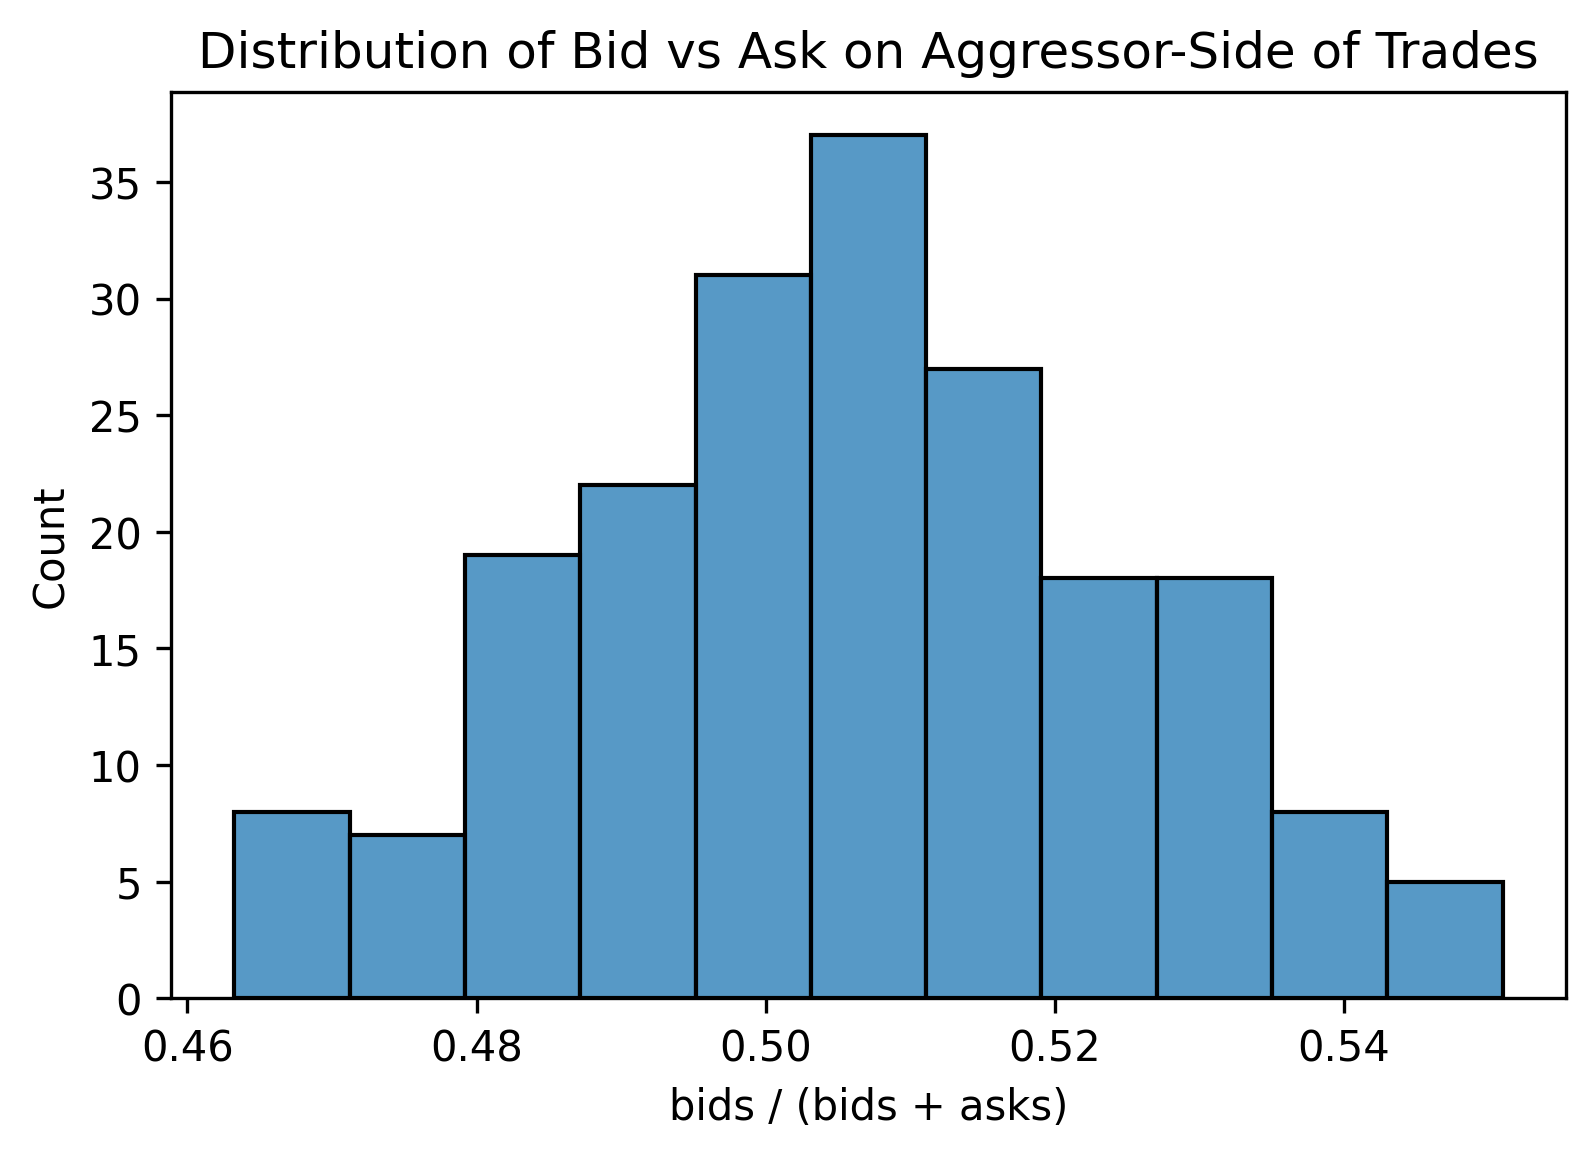

In [22]:
sns.histplot([bid_arr[i] / (bid_arr[i] + ask_arr[i]) for i in range(len(bid_arr))])
plt.xlabel("bids / (bids + asks)")
plt.title("Distribution of Bid vs Ask on Aggressor-Side of Trades")

In [23]:
volumes = []
for summary in summaries:
    summary["trade_volume"] = abs(summary["quantity"])
    volume = summary.groupby("mod_customer_id")["trade_volume"].sum()
    volumes.append(volume)

Text(0.5, 1.0, 'Proportion of Volume Traded from MainCharacter Agent (baseline 0.05)')

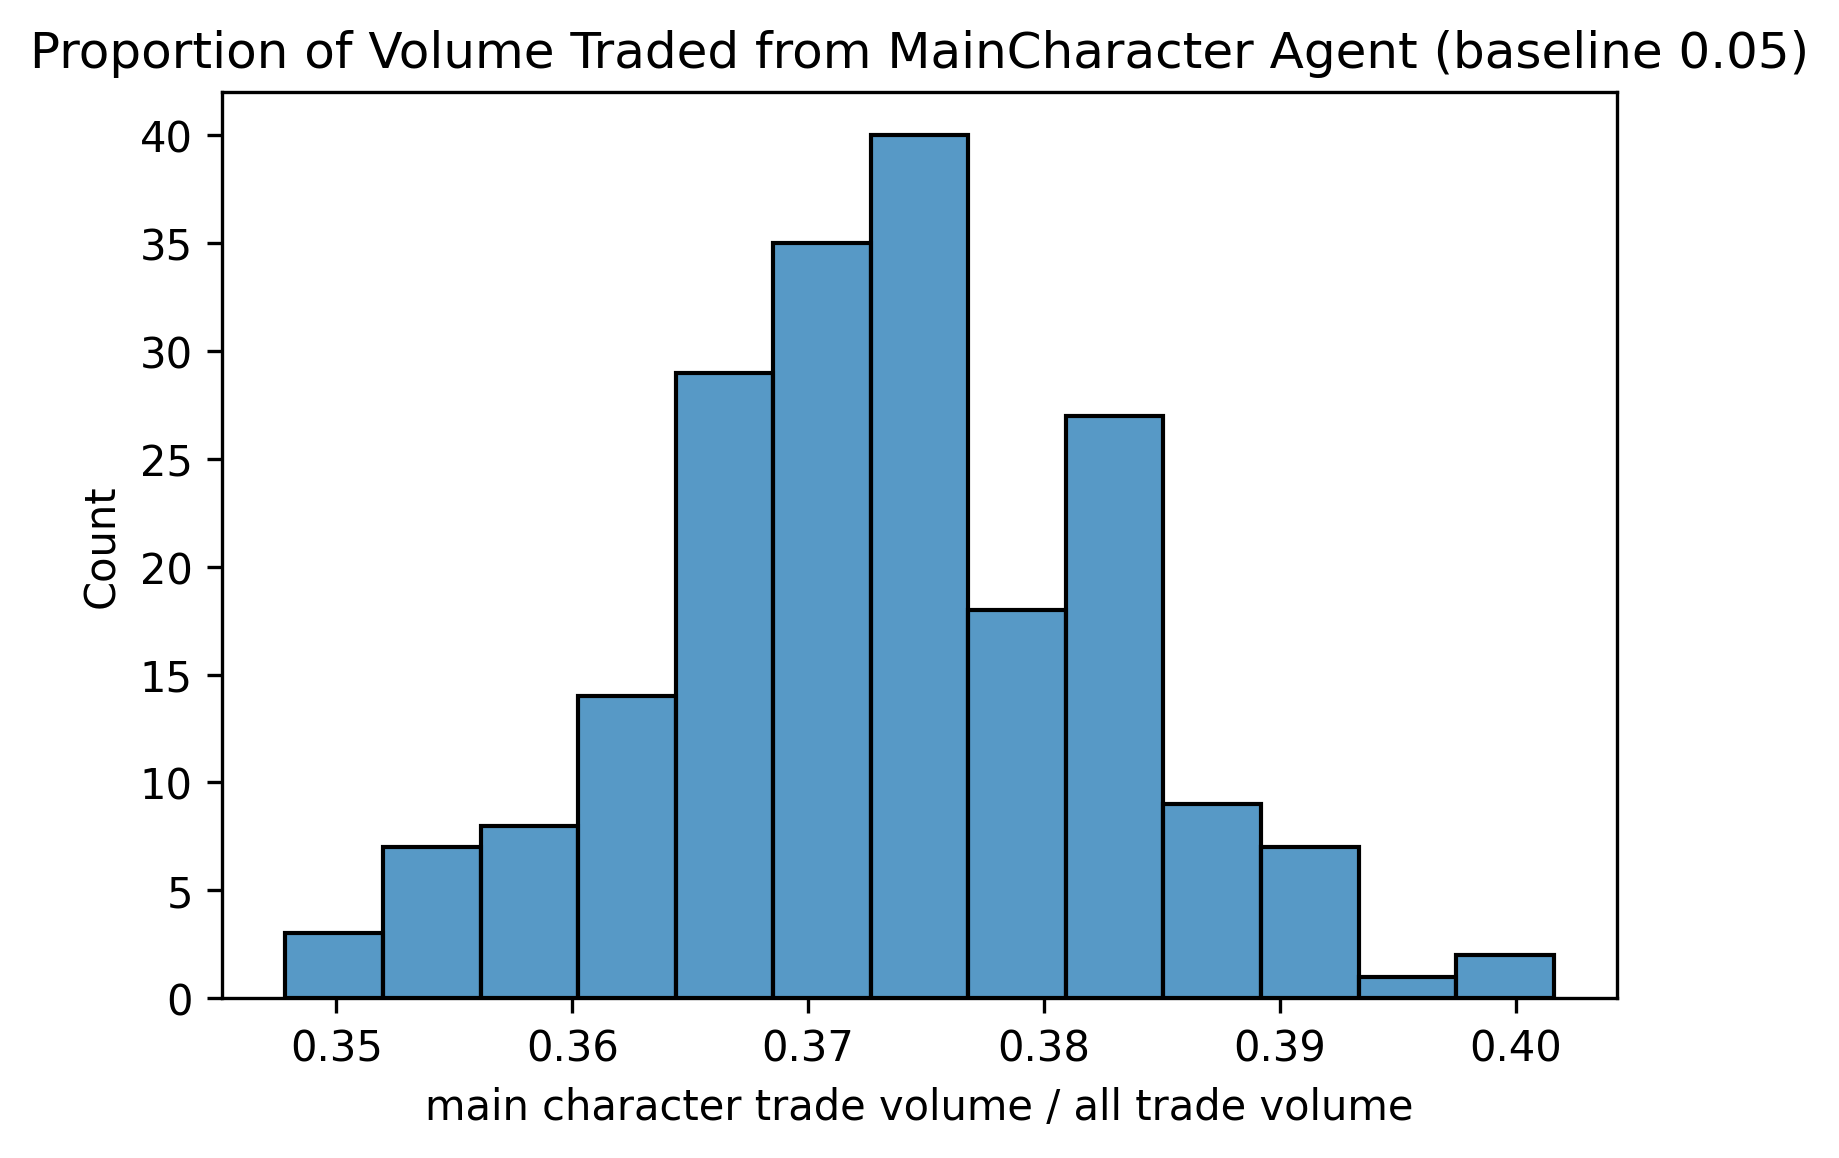

In [24]:
proportions = [v[9.5] / sum(v) for v in volumes]
sns.histplot(proportions)
plt.xlabel("main character trade volume / all trade volume")
plt.title("Proportion of Volume Traded from MainCharacter Agent (baseline 0.05)")

In [25]:
%%capture
profit_proportion = []
for i in range(len(exchanges)):
    exchange = exchanges[i]
    df = summarize_transactions(exchange, price_function, num_agents=20)[1]["profit"]
    profit_proportion.append(df[9.5] / volumes[i][9.5])

Text(0.5, 1.0, 'Relationship between profit per trade and rank')

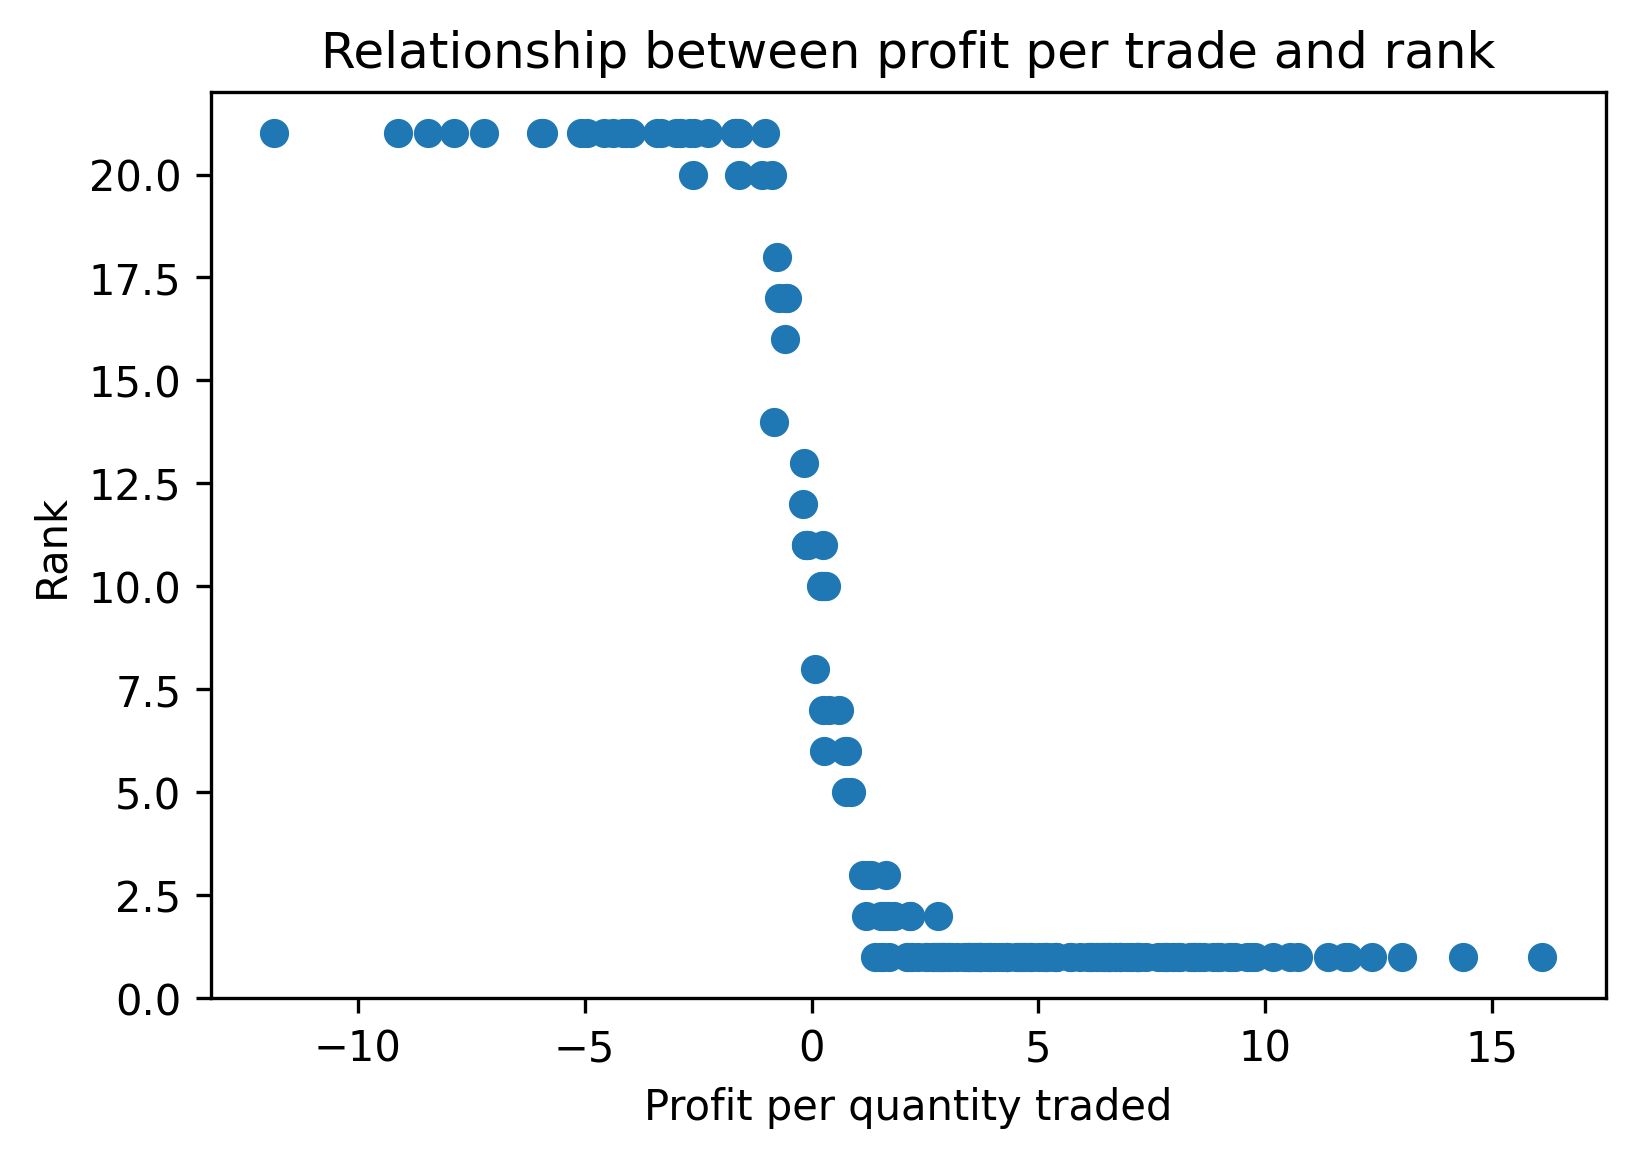

In [26]:
plt.scatter(profit_proportion, ranks)
plt.ylabel("Rank")
plt.xlabel("Profit per quantity traded")
plt.title("Relationship between profit per trade and rank")

Text(0.5, 1.0, 'Distribution of Profit Per Volume Traded')

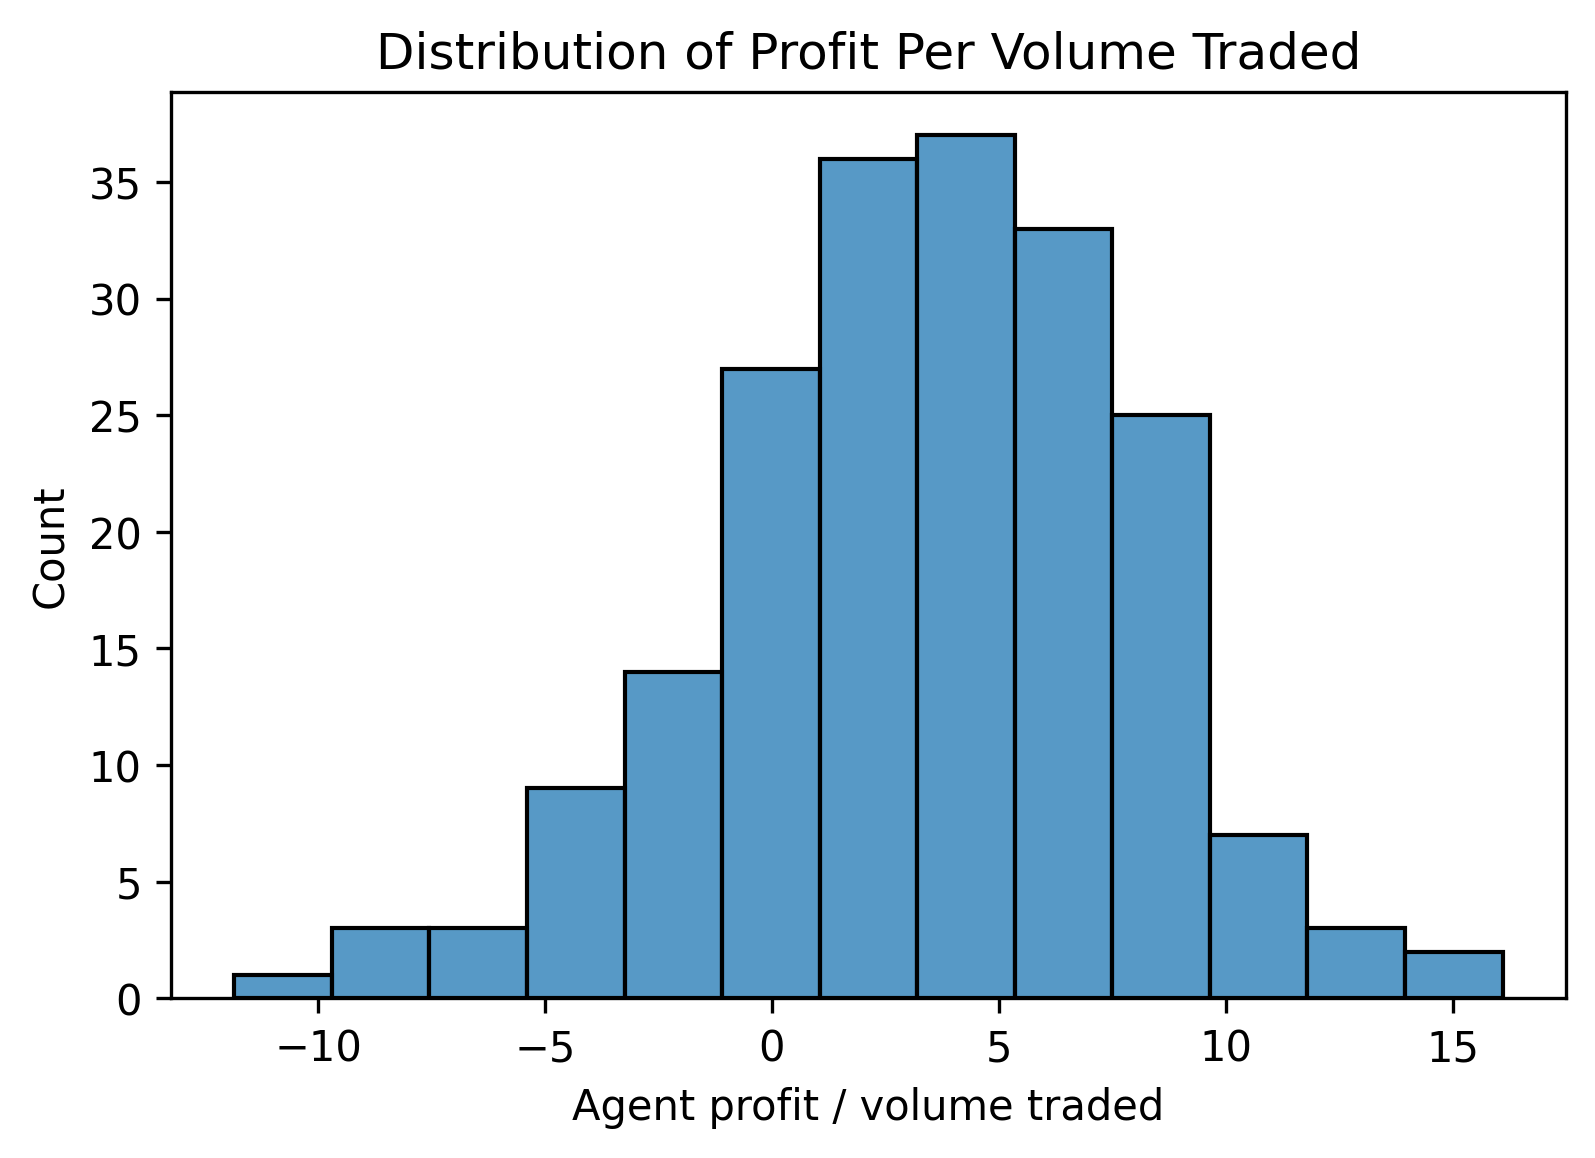

In [27]:
sns.histplot(profit_proportion)
plt.xlabel("Agent profit / volume traded")
plt.title("Distribution of Profit Per Volume Traded")